<a href="https://colab.research.google.com/github/ThuraAung1601/BHDD-using-streamlit/blob/main/BurmeseHandwrittenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BHDD Dataset Preprocessing 
- Dataset Link : https://github.com/baseresearch/BHDD
( Download raw file directly and upload to your drive for further uses )

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Loading

In [76]:
import pickle
import numpy as np

#url_path : Path of dataset in your drive
url_path = "/content/gdrive/MyDrive/BHDD Experiments /data.pkl" 

dataset = []

with open(url_path,"rb") as file:
    dataset = pickle.load(file)
    
trainDataset = dataset["trainDataset"]
testDataset = dataset["testDataset"]

print("Train Size: {} Test Size: {}".format(len(trainDataset), len(testDataset)))
            

Train Size: 60000 Test Size: 27561


In [77]:
import urllib.request
import gzip
import pickle
import os
import numpy as np
from PIL import Image

In [78]:
numberOfClass = 10

trainX = [list(td["image"] / 255) for td in trainDataset]
trainY = np.eye(numberOfClass)[np.array([td["label"] for td in trainDataset]).reshape(-1)].tolist() #One-hot encode training labels
testX = [list(td["image"] / 255) for td in testDataset]
testY = np.eye(numberOfClass)[np.array([td["label"] for td in testDataset]).reshape(-1)].tolist() #One-hot encode test labels

In [79]:
print("TrainImageShape:" + str(np.shape(trainX)),
     "TrainLabelShape:" + str(np.shape(trainY)),
     "TestImageShape:" + str(np.shape(testX)),
     "TestLabelShape:" + str(np.shape(testY)))

TrainImageShape:(60000, 28, 28) TrainLabelShape:(60000, 10) TestImageShape:(27561, 28, 28) TestLabelShape:(27561, 10)


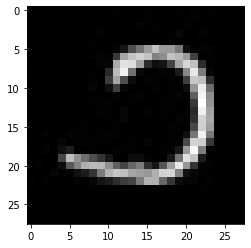

In [98]:
plt.imshow(trainX[6],cmap='gray')

# Deep Learning Algorithms
- Perceptron
- MLP
- ConvNet

## Visualize the Dataset

In [ ]:
import matplotlib.pyplot as plt
%pylab inline

def show_images(x, y, title_str):
    for c in range(1, 10):
        subplot(3, 3, c)
        i = randint(len(x)) 
        im = np.reshape(x[i], (28,28))
        axis("off")
        label = np.argmax(y[i]) 
        title("{} = {}".format(title_str, label))
        imshow(im, cmap='Greys')

Populating the interactive namespace from numpy and matplotlib


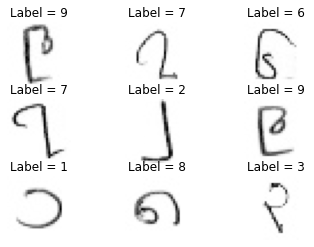

In [ ]:
### Display Training set

show_images(trainX, trainY, 'Label')

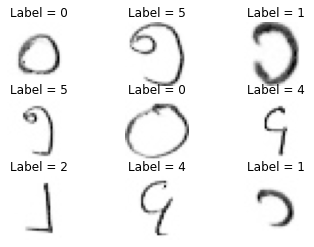

In [ ]:
### Display Test set

show_images(testX, testY, 'Label')

## Perceptron

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Scale images to the [0, 1] range
trainX = np.array(trainX)
testX = np.array(testX)

#Normalize 
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print("x_train shape:", trainX.shape)
print(trainX.shape[0], "train samples")
print(testX.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
27561 test samples


In [ ]:
trainY = np.array(trainY)
testY = np.array(testY)

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


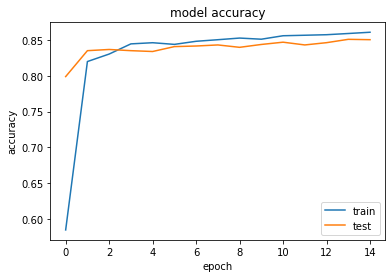

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='lower right')
plt.show()

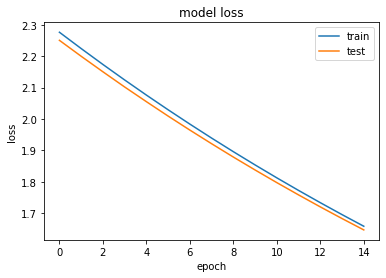

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.6300876140594482
Test accuracy: 0.8476107716560364


In [ ]:
loss, accuracy, precision, recall = model.evaluate(testX, testY, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

f1_score = (2* recall*precision)/(recall+precision)
print("f1_score", f1_score)

Loss 1.6300876140594482
Accuracy 0.8476107716560364
Precision 1.0
Recall 0.0009070788510143757
f1_score 0.0018125136092666098


## Multilayer Perceptron 

In [64]:
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Scale images to the [0, 1] range
trainX = np.array(trainX)
testX = np.array(testX)
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print("x_train shape:", trainX.shape)
print(trainX.shape[0], "train samples")
print(testX.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
27561 test samples


In [66]:
trainY = np.array(trainY)
testY = np.array(testY)

In [67]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 5ms/step - loss: 2.0900 - accuracy: 0.5695 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 1.7588 - val_accuracy: 0.7505 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 1.4432 - accuracy: 0.7648 - precision_5: 0.9951 - recall_5: 0.0411 - val_loss: 1.1820 - val_accuracy: 0.7917 - val_precision_5: 0.9936 - val_recall_5: 0.1295
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.9809 - accuracy: 0.8369 - precision_5: 0.9829 - recall_5: 0.3031 - val_loss: 0.8254 - val_accuracy: 0.8578 - val_precision_5: 0.9815 - val_recall_5: 0.4522
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.6964 - accuracy: 0.8841 - precision_5: 0.9777 - recall_5: 0.5888 - val_loss: 0.6036 - val_accuracy: 0.8943 - val_precision_5: 0.9747 - val_recall_5: 0.6883
Epoch 5/15
422/422 [==============================] - 2s

In [68]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_5', 'recall_5', 'val_loss', 'val_accuracy', 'val_precision_5', 'val_recall_5'])


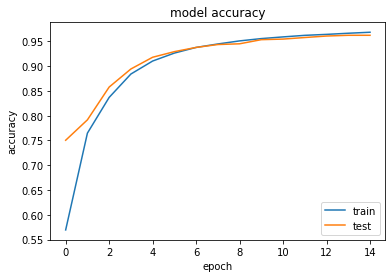

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='lower right')
plt.show()

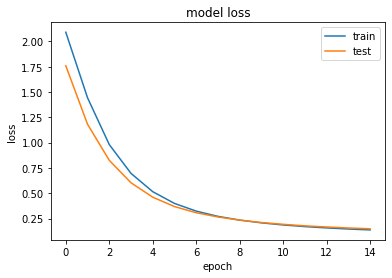

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper right')
plt.show()

In [71]:
score = model.evaluate(testX, testY, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.14050395786762238
Test accuracy: 0.9699575304985046


In [72]:
loss, accuracy, precision, recall = model.evaluate(testX, testY, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

f1_score = (2* recall*precision)/(recall+precision)
print("f1_score", f1_score)

Loss 0.14050395786762238
Accuracy 0.9699575304985046
Precision 0.9767484664916992
Recall 0.9617575407028198
f1_score 0.969195039408556


## ConvNet

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
# Scale images to the [0, 1] range
trainX = np.array(trainX)
testX = np.array(testX)
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print("x_train shape:", trainX.shape)
print(trainX.shape[0], "train samples")
print(testX.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
27561 test samples


In [ ]:
trainY = np.array(trainY)
testY = np.array(testY)

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 32s 73ms/step - loss: 1.7154 - accuracy: 0.4957 - precision_3: 0.9573 - recall_3: 0.1507 - val_loss: 0.4901 - val_accuracy: 0.9143 - val_precision_3: 0.9653 - val_recall_3: 0.7933
Epoch 2/15
422/422 [==============================] - 30s 72ms/step - loss: 0.3908 - accuracy: 0.8946 - precision_3: 0.9340 - recall_3: 0.8420 - val_loss: 0.2369 - val_accuracy: 0.9388 - val_precision_3: 0.9588 - val_recall_3: 0.9183
Epoch 3/15
422/422 [==============================] - 30s 72ms/step - loss: 0.2771 - accuracy: 0.9211 - precision_3: 0.9394 - recall_3: 0.9010 - val_loss: 0.1847 - val_accuracy: 0.9502 - val_precision_3: 0.9639 - val_recall_3: 0.9388
Epoch 4/15
422/422 [==============================] - 30s 72ms/step - loss: 0.2342 - accuracy: 0.9317 - precision_3: 0.9470 - recall_3: 0.9184 - val_loss: 0.1587 - val_accuracy: 0.9563 - val_precision_3: 0.9683 - val_recall_3: 0.9470
Epoch 5/15
422/422 [==============================] - 30s 72ms/s

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_3', 'recall_3', 'val_loss', 'val_accuracy', 'val_precision_3', 'val_recall_3'])


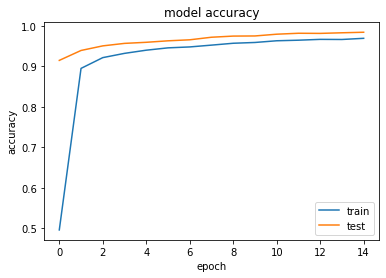

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='lower right')
plt.show()

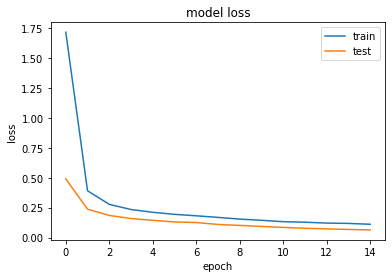

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0745575949549675
Test accuracy: 0.9818947315216064


In [ ]:
loss, accuracy, precision, recall = model.evaluate(testX, testY, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

f1_score = (2* recall*precision)/(recall+precision)
print("f1_score", f1_score)

Loss 0.0745575949549675
Accuracy 0.9818947315216064
Precision 0.9839749336242676
Recall 0.9802619814872742
f1_score 0.9821149483014988


In [ ]:
from keras.models import load_model

model.save('cnn.h5')  # creates a HDF5 file 'my_model.h5'